# Evaluation of the mean of a normal distribution $\mathcal{N}(5,2)$

1. Use Monte Carlo sampling to determine the mean of a normal distribution $\mathcal{N}(5,2)$. We will use 100 particles.
2. Repeat the previous question 10000 times and save each result in a vector $V_M$. Plot the result. What do you notice ?
3. Repeat the previous questions with 1000 then 10000 particles. What do you notice ? How do you explain this phenomenon?

https://numpy.org/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

https://matplotlib.org/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Determine the mean of a normal distribution N(5,2) using 100 particles
true_mean = 5
std_dev = 2
n_particles = 100

# Monte Carlo sampling with 100 particles
samples = np.random.normal(true_mean, std_dev, n_particles)
sample_mean = np.mean(samples)

print(f"Estimated mean with {n_particles} particles: {sample_mean:.4f}")

Estimated mean with 100 particles: 5.0620


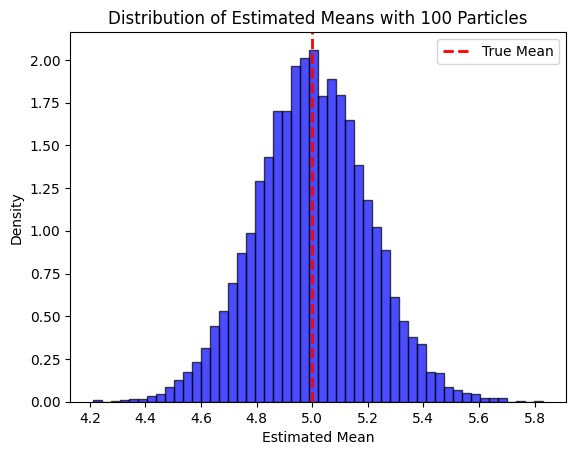

In [13]:
# Repeat the experiment
n_experiments = 10000
V_M = []

for _ in range(n_experiments):
    samples = np.random.normal(true_mean, std_dev, n_particles)
    V_M.append(np.mean(samples))

# Plotting the results
plt.hist(V_M, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(true_mean, color='red', linestyle='dashed', linewidth=2, label="True Mean")
plt.title("Distribution of Estimated Means with 100 Particles")
plt.xlabel("Estimated Mean")
plt.ylabel("Density")
plt.legend()
plt.show()

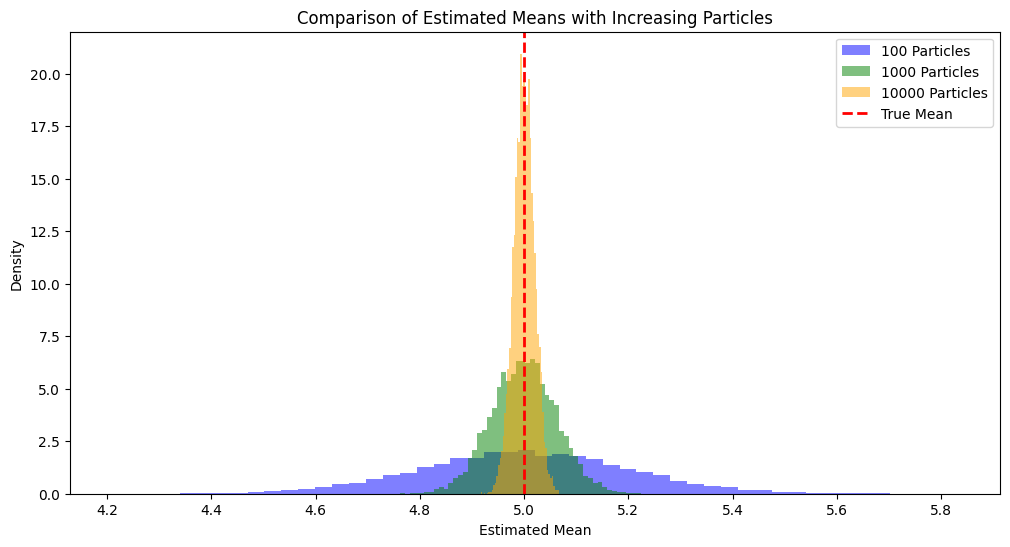

In [14]:


# Function to run the Monte Carlo experiment
def monte_carlo_means(n_particles, n_experiments):
    V_M = []
    for _ in range(n_experiments):
        samples = np.random.normal(true_mean, std_dev, n_particles)
        V_M.append(np.mean(samples))
    return V_M

# Experiment with 1000 particles
V_M_1000 = monte_carlo_means(1000, n_experiments)

# Experiment with 10000 particles
V_M_10000 = monte_carlo_means(10000, n_experiments)

# Plotting all results
plt.figure(figsize=(12, 6))

# 100 particles
plt.hist(V_M, bins=50, density=True, alpha=0.5, label="100 Particles", color='blue')

# 1000 particles
plt.hist(V_M_1000, bins=50, density=True, alpha=0.5, label="1000 Particles", color='green')

# 10000 particles
plt.hist(V_M_10000, bins=50, density=True, alpha=0.5, label="10000 Particles", color='orange')

# Add true mean line
plt.axvline(true_mean, color='red', linestyle='dashed', linewidth=2, label="True Mean")

plt.title("Comparison of Estimated Means with Increasing Particles")
plt.xlabel("Estimated Mean")
plt.ylabel("Density")
plt.legend()
plt.show()


### Explanation

This phenomenon is explained by the **Law of Large Numbers**:

- As the number of particles ($n$) increases, the sample mean converges to the true mean of the distribution.
- The standard error of the mean, which is proportional to $\frac{\sigma}{\sqrt{n}}$, decreases as $n$ increases. This reduction in variability makes the estimates more precise.